<a href="https://colab.research.google.com/github/AbdullahZahid77/Olympics-Medal-Prediction-For-Countries/blob/main/Olympics_Countries_Medals_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
teams= pd.read_csv('/content/drive/MyDrive/teams.csv') #load data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
teams.head() #inspecting the data

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [ ]:
teams=teams[['team','country','year','athletes','age','prev_medals','medals']]
#teams now includes only the required columns
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [ ]:
teams.corr()['medals']
#if correlation is high linear model can be used

<ipython-input-5-d96eb1e73e40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()['medals']


year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [ ]:
import seaborn as sns

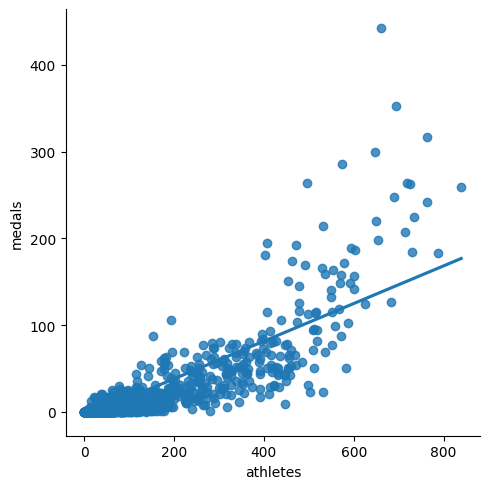

In [ ]:
sns.lmplot(data=teams,x='athletes',y='medals',fit_reg='True',ci=None)
#analyzing the relation with the help of a graph

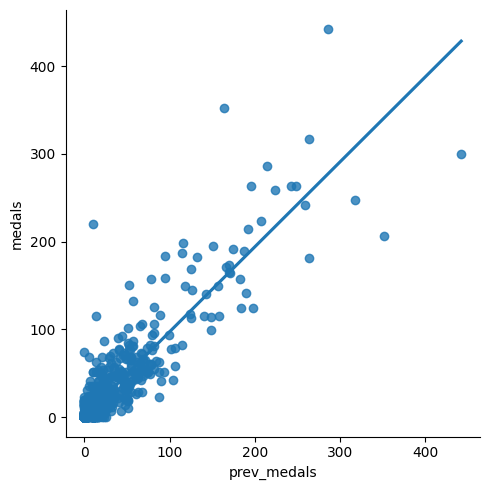

In [ ]:
sns.lmplot(data=teams,x='prev_medals',y='medals',fit_reg='True',ci=None)
#analyzing the relation with the help of a graph


In [ ]:
teams[teams.isnull().any(axis=1)].head(20)
#checking for missing values in the dataset
teams = teams.dropna()
teams.shape

(2144, 7)

In [ ]:
#average_values = teams['prev_medals'].mean()

# Fill missing values with the average value
#teams['prev_medals'].fillna(average_values, inplace=True)

teams=teams.dropna()
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [ ]:
#splitting data into train data and test data
train_data=teams[teams['year']<2012].copy()
test_data=teams[teams['year']>=2012].copy()


In [ ]:
train_data.shape

(1736, 7)

In [ ]:
test_data.shape

(408, 7)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
predictors=['athletes','prev_medals']
target='medals'

In [ ]:
#fitting our model
model.fit(train_data[predictors],train_data["medals"])

TypeError: ignored

In [ ]:
predictions=model.predict(test_data[predictors]) #making predictions using linear regression model
predictions

array([-1.77753037e+00, -2.03248903e+00, -2.14496717e+00, -2.48491205e+00,
        1.73439653e+00,  4.00153252e+00, -2.48491205e+00, -2.65488449e+00,
       -2.03116966e-02, -7.85187668e-01, -2.65488449e+00, -2.22995339e+00,
        4.56595965e+01,  3.01622253e+01,  3.88403347e+00,  2.01684711e+00,
       -2.65488449e+00, -2.39992583e+00, -2.65488449e+00, -2.65488449e+00,
        1.46087957e+02,  1.21669543e+02,  6.77607537e+00,  4.22899926e+00,
        6.97102928e+00,  9.94303650e+00,  4.42144271e+00,  3.06417366e+00,
       -2.39992583e+00, -2.39992583e+00, -2.31493961e+00, -1.89000852e+00,
       -2.48491205e+00, -2.14496717e+00,  1.26101221e+01,  1.08554139e+01,
       -2.56989827e+00, -2.48491205e+00, -2.31493961e+00, -2.31493961e+00,
       -2.82485693e+00, -2.82485693e+00, -2.31493961e+00, -2.05998095e+00,
       -2.73987071e+00, -2.73987071e+00,  3.32416897e+01,  2.53429923e+01,
       -2.56989827e+00, -1.97499473e+00, -2.65488449e+00, -1.09764062e+00,
        7.81867243e+01,  

In [ ]:
test_data['predictions']=predictions
test_data

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-1.777530
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-2.032489
24,ALB,Albania,2012,10,25.7,0.0,0,-2.144967
25,ALB,Albania,2016,6,23.7,0.0,0,-2.484912
37,ALG,Algeria,2012,39,24.8,2.0,1,1.734397
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-2.739871
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-2.399926
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-2.399926
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,0.599573


In [ ]:
test_data.loc[test_data["predictions"]<0,'predictions']=0
test_data['predictions'].round()
test_data

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,1.734397
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,0.599573


In [ ]:
from sklearn.metrics import mean_absolute_error
error= mean_absolute_error(test_data['medals'],test_data['predictions'])
error

3.31028430161536

In [ ]:
teams.describe()['medals'] #error below std so not a problem

count    2144.000000
mean       10.556437
std        33.028143
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       442.000000
Name: medals, dtype: float64

In [ ]:
test_data[test_data["team"] == "USA"]
test_data[test_data["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.201006
908,IND,India,2016,130,26.1,6.0,2,12.297669


In [ ]:
errors = (test_data["medals"] - predictions).abs()

In [ ]:
error_by_team = errors.groupby(test_data["team"]).mean()
medals_by_team = test_data["medals"].groupby(test_data["team"]).mean()
error_ratio =  error_by_team / medals_by_team
error_ratio

team
AFG    4.810019
ALB         inf
ALG    0.911976
AND         inf
ANG         inf
         ...   
VIE    1.431497
VIN         inf
YEM         inf
ZAM         inf
ZIM         inf
Name: medals, Length: 207, dtype: float64

In [ ]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    4.810019
ALG    0.911976
ARG    0.849313
ARM    0.409598
AUS    0.366110
         ...   
UKR    1.031297
USA    0.121601
UZB    0.630155
VEN    1.893122
VIE    1.431497
Name: medals, Length: 98, dtype: float64

<Axes: ylabel='Frequency'>

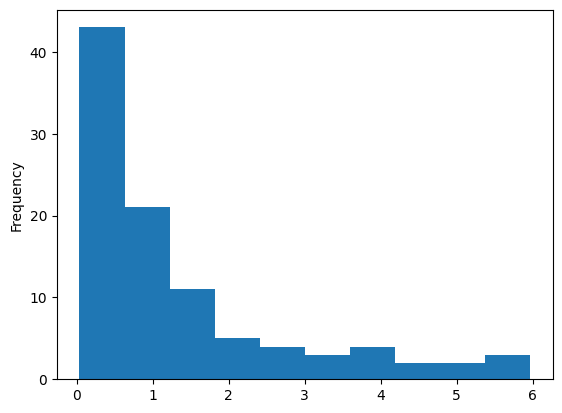

In [ ]:
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values() #error ratio for each country

team
NZL    0.035328
CAN    0.036145
FRA    0.046074
RUS    0.077074
KEN    0.098539
         ...   
AFG    4.810019
PHI    4.949989
JOR    5.544893
BDI    5.629879
NIG    5.969824
Name: medals, Length: 98, dtype: float64